<a href="https://colab.research.google.com/github/thdudgus/ML-study/blob/main/1_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마켓과 머신러닝

## 생선 분류 문제

### 도미 데이터 준비하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

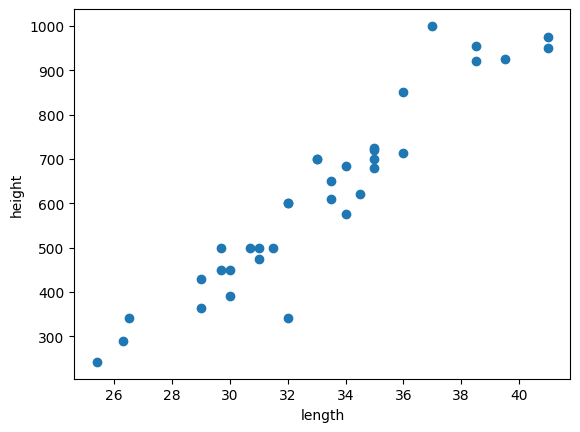

In [ ]:
# 파이썬에서 과학계산용 그래프를 그리는 대표적인 패키지 : matpliblib
import matplotlib.pyplot as plt #matplotlib의 pylot함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') #x축은 길이
plt.ylabel('height') #y축은 무게
plt.show()

### 빙어 데이터 준비하기

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

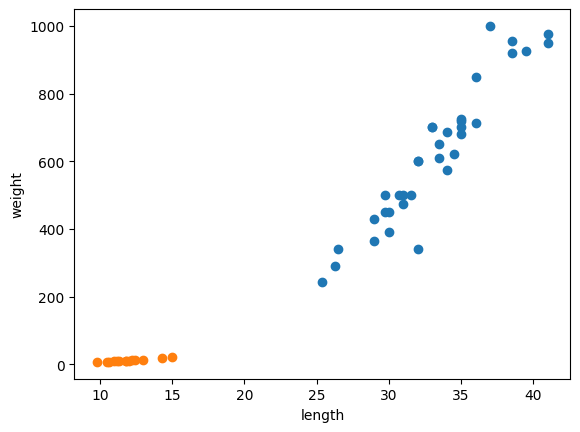

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫번째 머신러닝 프로그램

파이썬의 연산자 오버로딩을 사용하여 두 리스트를 하나로 합침.
<br/>
<img src='https://drive.google.com/uc?id=16xb2sFEpgVO4ThJso5EBVaqm95v_pg_-' height = 200 width = 400>

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight


zip()함수는 나열된 리스트에서 원소를 하나씩 꺼내주는 역할을 하고,
이렇게 하나씩 꺼낸 데이터에 동일한 작업을 for문으로 계속 반복하게 한다.   

아래 코드에서 for문은 zip()함수로 length와 weight 리스트에서 원소를 하나씩 꺼내어 l과 w에 할당한다.   
그러면 [l, w]가 하나의 원소로 구성된 리스트가 만들어진다.   
위 리스트들이 모여 하나의 리스트를 이룸 => 2차원 리스트

In [ ]:
fish_data= [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


머신러닝은 물론, 컴퓨터 프로그램은 문자를 직접 이해할 수 없기 때문에 도미와 빙어를 숫자 1과 0으로 표현. (이진분류)   
위에 도미와 빙어를 순서대로 나열했기 때문에 **정답 리스트**는 1이 35번 등장하고, 0이 14번 등장하면 된다.   
곱셈 연산자로 파이썬 리스트를 간단하게 반복시킨다.

In [ ]:
fish_target=[1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


사이킷런 패키지에서 K-최근접 이웃 알고리즘을 구현한 클래스인 KNeighborsClassifier를 import한다.   
(sklearn.neighbors 모듈 밑에 KNeighborsClassifier 클래스 구현)   

import한 KNeighborsClassifier 클래스의 객체를 만든다.    
모델 : 알고리즘이 객체화된 것.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

이 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. => 훈련(training)

fit() 메소드가 kn객체에 두 데이터를 전달하여 알고리즘을 훈련한다.

In [ ]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

객체(모델)kn이 훈련되어 있는 정도를 score()메소드로 평가한다.
0에서 1사이를 반환하며 1에 가까울 수록 데이터를 정확히 맞춘 것.

In [ ]:
kn.score(fish_data, fish_target)

1.0

### K-nearest neighbors(K-NN) algorithm
K-최근접 이웃 알고리즘

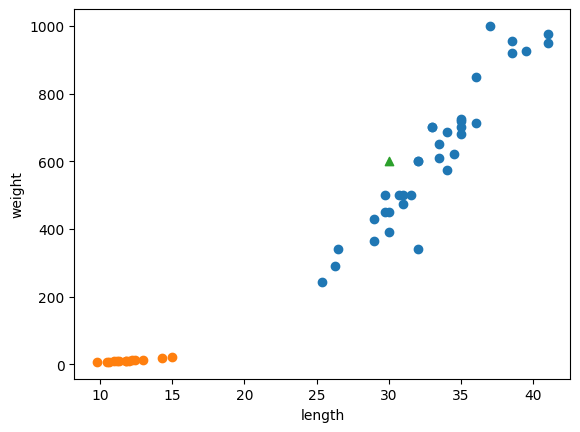

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

predict()메소드는 해로운 데이터의 정답을 예측한다.   
fit()메소드처럼 리스트의 리스트를 전달해야 한다. => 따라서 데이터를 리스트로 2번 감쌌음.

In [ ]:
kn.predict([[30, 60]])

array([0])

K-최근접 이웃 알고리즘을 사용하기 위해선 데이터를 모두 가지고 있으면 된다.    
새로운 데이터에 대해 예측할 때는 가장 가까운 직선 거리에 어떤 데이터가 있는지를 살피면 되지만, 데이터가 아주 많은 경우엔 사용하기 힘들다.   
데이터가 크기 때문에 많은 메모리가 필요하고, 직선거리를 계산하는 데도 많은 시간이 필요하기 때문이다.   

사이킷런의 KNeighborsClassfier 클래스도 마찬가지로, _fit_X 속성에 위에서 전달한 fish_data를 보두 가지고 있다. _y 속성에도 fish_target을 가지고 있다.

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


실제로 k-최근접 이웃 알고리즘은 무언가 훈련되는 게 없는 셈.   
fit()메소드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면, 가장 가까운 데이터를 참고하여 도미인지 빙어인지 구분한다.   

가까운 데이터를 몇개 참고할지는 정하기 나름이다. KNeighborsClassfier 클래스의 기본값은 5로, 이 기준은 n_neighbors 매개변수로 바꿀 수 있다.    

In [ ]:
# 참고 데이터를 49개로 한 kn49 모델
kn49 = KNeighborsClassifier(n_neighbors=49)

# 가장 가까운 데이터를 49개 사용하는 모델에 fish_data를 적용하면, fish_data의 데이터 49개 중 도미가 35개이기 때문에 어떤 데이터를 넣어도 무조건 도미로 예측할 것.
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

fish_data에 있는 생선 중에 도미가 35개이고, 빙어가 14개이다.    
kn49 모델은 도미만 올바르게 맞히기 때문에 아래와 같이 정확도를 계산하면 score()메소드와 같은 값을 얻을 수 있다.

In [ ]:
print(35/49)

0.7142857142857143


## 확인문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
